In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd  
import seaborn as sns

In [2]:
data=pd.read_csv(r"/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.head().style.set_sticky()  # Sticky headers for easy scrolling


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [4]:
data["Hour"] = (data["Time"] % 86400) // 3600

In [5]:
data.head().style.set_sticky()  # Sticky headers for easy scrolling


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0,0.000000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0.000000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0,0.000000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0.000000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0,0.000000


In [6]:
data.head(10000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001.0,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,...,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0,4.0
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0,4.0
9997,15008.0,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,...,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0,4.0
9998,15010.0,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,...,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0,4.0


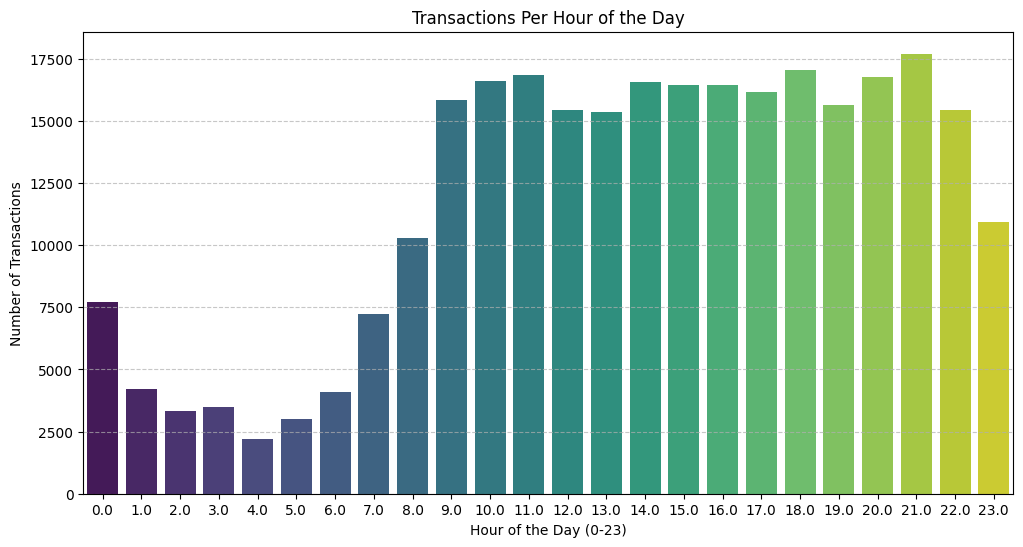

In [7]:
hourly_transactions = data["Hour"].value_counts().sort_index()

# Plot the transaction count per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values, palette="viridis")

# Customize plot
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Hour of the Day")
plt.xticks(range(24))  # Ensure all hours (0-23) are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

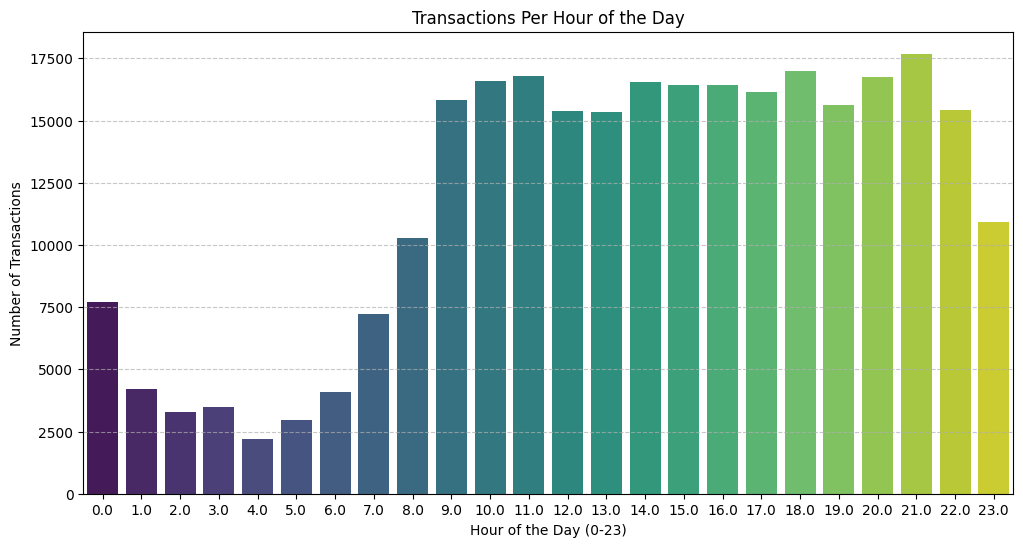

In [8]:
non_fraud = data[data["Class"] == 0]

non_fraud_count = non_fraud["Hour"].value_counts().sort_index()

# Plot the transaction count per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=non_fraud_count.index, y=non_fraud_count.values, palette="viridis")

# Customize plot
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Hour of the Day")
plt.xticks(range(24))  # Ensure all hours (0-23) are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

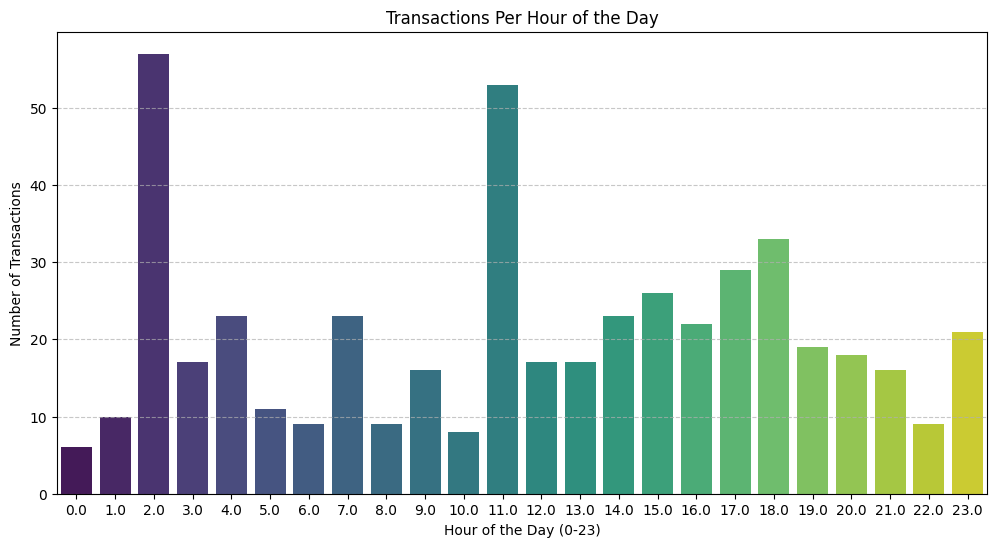

In [9]:
fraud = data[data["Class"] == 1]
fraud_count = fraud["Hour"].value_counts().sort_index()

# Plot the transaction count per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette="viridis")

# Customize plot
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Hour of the Day")
plt.xticks(range(24))  # Ensure all hours (0-23) are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [10]:
data.drop(columns=["Time"], inplace=True)


In [11]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0


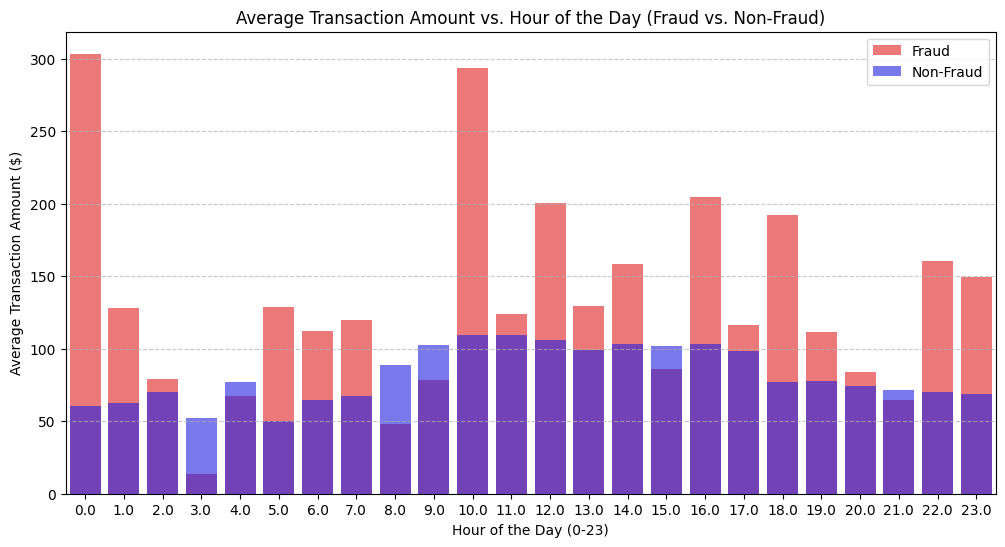

In [12]:
# Calculate average transaction amount per hour
fraud_avg_amount = fraud.groupby("Hour")["Amount"].mean()
non_fraud_avg_amount = non_fraud.groupby("Hour")["Amount"].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))

# Fraud Transactions
sns.barplot(x=fraud_avg_amount.index, y=fraud_avg_amount.values, color="red", alpha=0.6, label="Fraud")

# Non-Fraud Transactions
sns.barplot(x=non_fraud_avg_amount.index, y=non_fraud_avg_amount.values, color="blue", alpha=0.6, label="Non-Fraud")

# Customize the plot
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Average Transaction Amount ($)")
plt.title("Average Transaction Amount vs. Hour of the Day (Fraud vs. Non-Fraud)")
plt.legend()
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

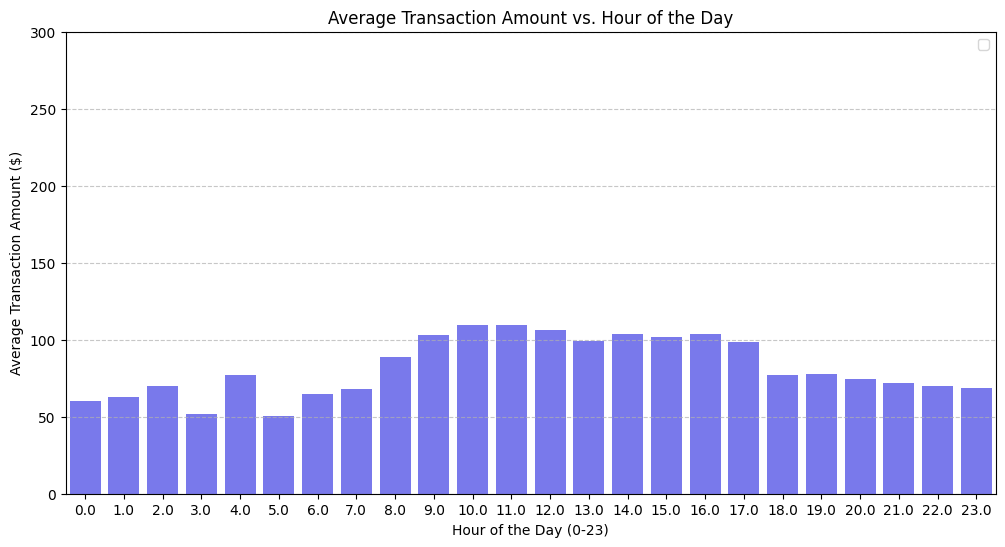

In [13]:
# Calculate average transaction amount per hour
avg_amount = data.groupby("Hour")["Amount"].mean()


# Plot the bar graph
plt.figure(figsize=(12, 6))

# Fraud Transactions
sns.barplot(x=avg_amount.index, y=avg_amount.values, color="blue", alpha=0.6)

# Customize the plot
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Average Transaction Amount ($)")
plt.title("Average Transaction Amount vs. Hour of the Day")
plt.legend()
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, 300)
# Show the plot
plt.show()

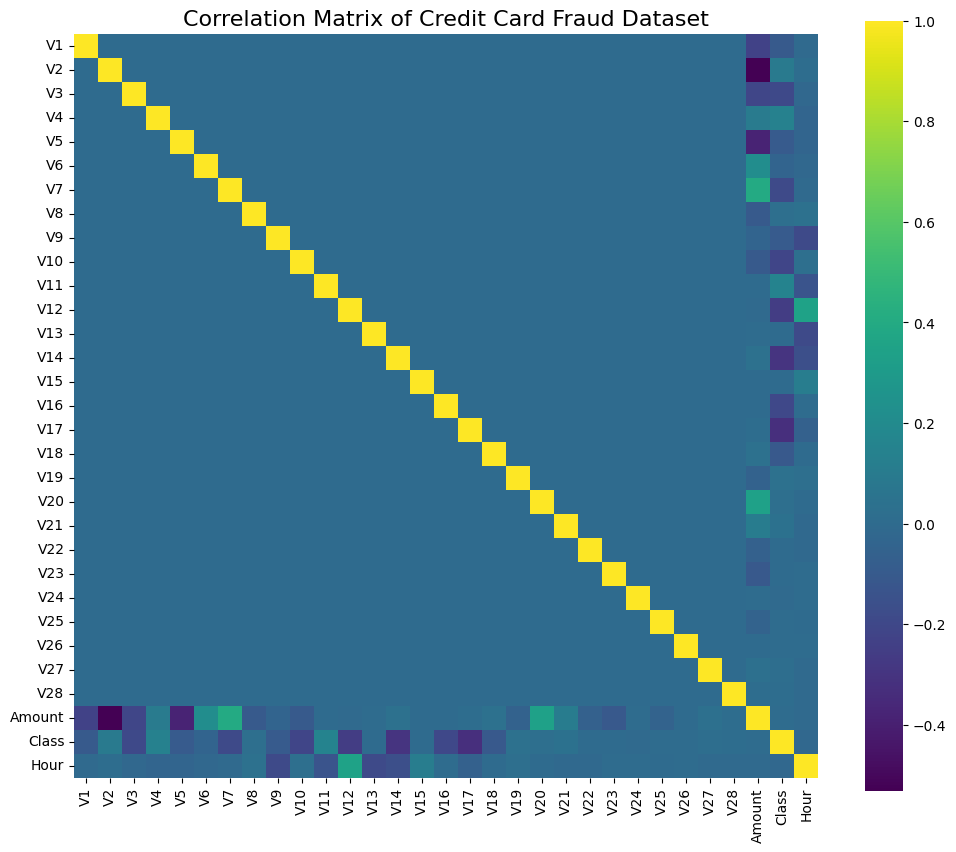

In [14]:

corr_matrix = data.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap with the viridis palette
sns.heatmap(corr_matrix, cmap='viridis', annot=False, fmt='.2f', 
            square=True, cbar=True)

# Add a title
plt.title('Correlation Matrix of Credit Card Fraud Dataset', fontsize=16)

# Show the plot
plt.show()